# Simulation of Multivariate Normal Distribution

In [1]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/Users/nikhildonde/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
mean_A = torch.tensor([-0.5, -0.5])
cov_A = torch.tensor([[1.0, 0.25], [0.25, 1.0]])
mean_B = torch.tensor([0.5, 0.5])
cov_B = torch.tensor([[1.0, 0.25], [0.25, 1.0]])
m = 1000

In [3]:
dist_A = torch.distributions.MultivariateNormal(mean_A, covariance_matrix=cov_A)
samples_A = dist_A.sample((m,))

In [4]:
dist_B = torch.distributions.MultivariateNormal(mean_B, covariance_matrix=cov_B)
samples_B = dist_B.sample((m,))

In [5]:
X = torch.cat((samples_A, samples_B), dim=0)

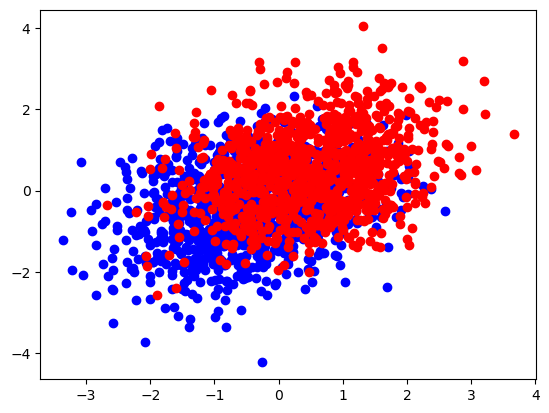

In [6]:
plt.scatter(samples_A[:, 0].numpy(), samples_A[:, 1].numpy(), color='blue')
plt.scatter(samples_B[:, 0].numpy(), samples_B[:, 1].numpy(), color='red')

# K-Means Clustering

In [7]:
num_clusters = 2
max_iters = 100
indices = torch.randperm(X.size(0))[:num_clusters]
centroids = X[indices]

In [8]:
for i in range(max_iters):
    dists = torch.cdist(X, centroids)
    _, cluster_assignments = torch.min(dists, dim=1)
    new_centroids = torch.stack([X[cluster_assignments == j].mean(dim=0) for j in range(num_clusters)])
    centroids = new_centroids

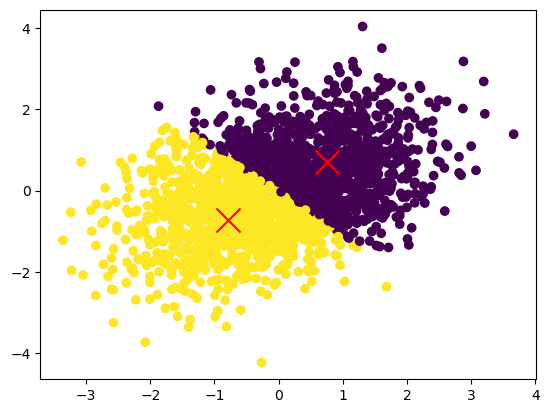

In [9]:
plt.scatter(X[:, 0].numpy(), X[:, 1].numpy(), c=cluster_assignments.numpy(), cmap='viridis', marker='o')
plt.scatter(centroids[:, 0].numpy(), centroids[:, 1].numpy(), s=300, c='red', marker='x', label='Centroids')
plt.show()

# Projection with Principal Components Analysis (PCA)

In [10]:
X = np.random.normal(0, 1, (100, 4))
X[:, 2] = 3*X[:,0] - 2 * X[:,1] + np.random.normal(0, 0.1, 100)
X[:, 3] = 1.5 * X[:, 0] - 0.5 * X[:, 1] + np.random.normal(0, 0.1, 100)
X = X - np.mean(X, axis = 0)

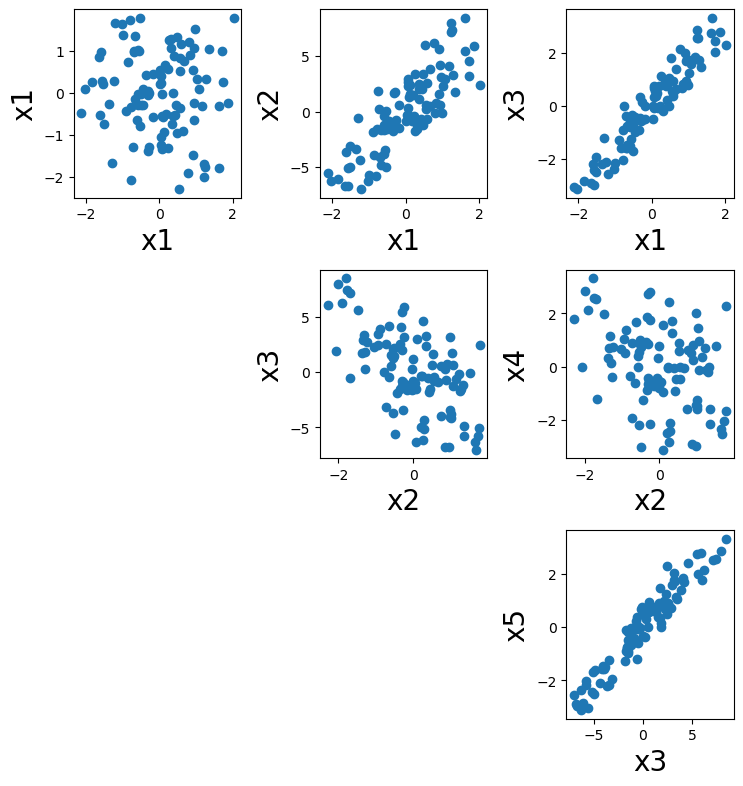

In [11]:
plt.figure(figsize = (10,10))
for i in range(4):
    for j in range(4):
        if j > i:
            plt.subplot(4, 4, i*4+j*1)
            plt.scatter(X[:, i], X[:, j])
            plt.xlabel(f'x{i+1}', fontsize = 20)
            plt.ylabel(f'x{j+i}', fontsize = 20)

plt.tight_layout()

In [12]:
X_tensor = torch.tensor(X, dtype=torch.float32)
cov_matrix = torch.cov(X_tensor.T)

In [13]:
eigenvalues, eigenvectors = torch.linalg.eig(cov_matrix)
eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real

In [14]:
sorted_indices = torch.argsort(eigenvalues, descending=True)
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

In [15]:
print(sorted_eigenvalues)
print(sorted_eigenvectors)

tensor([1.5844e+01, 1.0196e+00, 1.0244e-02, 5.0208e-04])
tensor([[ 0.2006, -0.4865,  0.1761, -0.8319],
        [-0.1460, -0.7887,  0.3321,  0.4964],
        [ 0.8942,  0.1277,  0.3691,  0.2190],
        [ 0.3727, -0.3535, -0.8500,  0.1167]])


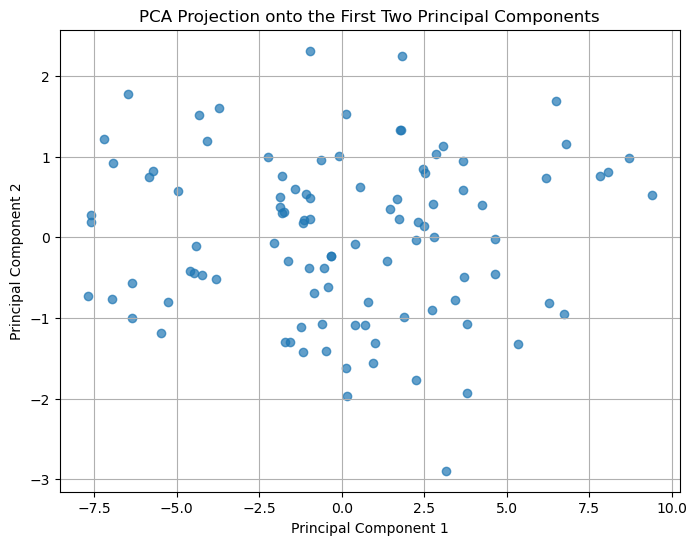

In [16]:
pc1 = sorted_eigenvectors[:, 0]
pc2 = sorted_eigenvectors[:, 1]
X_projected = X_tensor @ torch.stack([pc1, pc2], dim=1)
X_projected_np = X_projected.numpy()
plt.figure(figsize=(8, 6))
plt.scatter(X_projected_np[:, 0], X_projected_np[:, 1], alpha=0.7)
plt.title('PCA Projection onto the First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
